In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from collections import Counter

#  KNN

### In all my project, I refer to positive as Outcome = 1 (positive diagnosis) and to negative as Outcome = 0.

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.shape

(768, 9)

In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


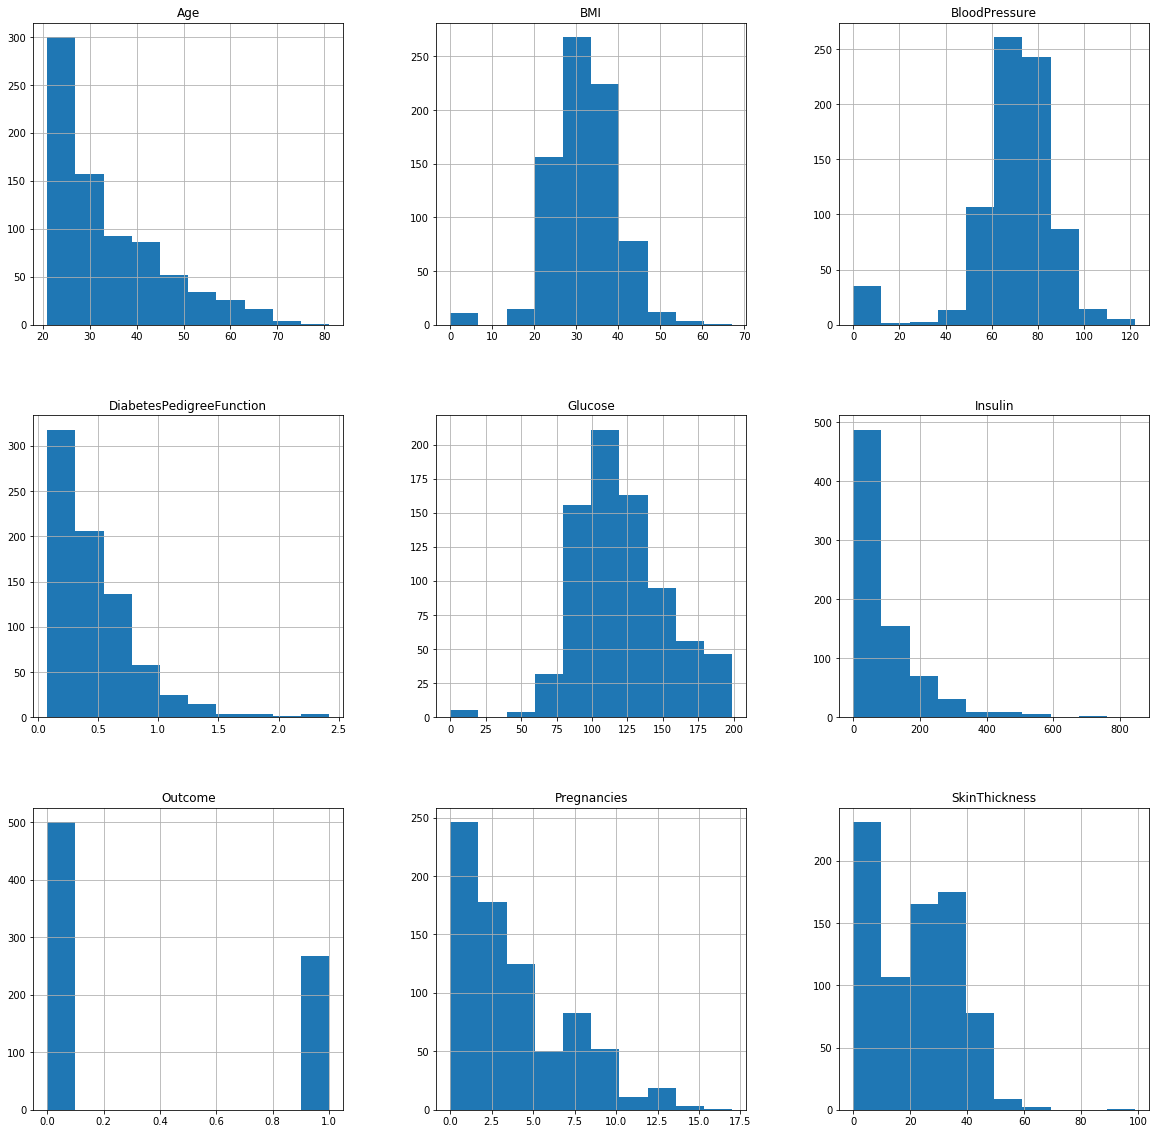

In [7]:
# show the distributions of each features in the dataset
p = dataset.hist(figsize = (20,20))

##  Following columns or variables have an invalid 0 value:
### Glucose, BloodPressure, SkinThickness, Insulin, BMI
### It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [8]:
# replace zeros with nan
dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [9]:
print(dataset.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


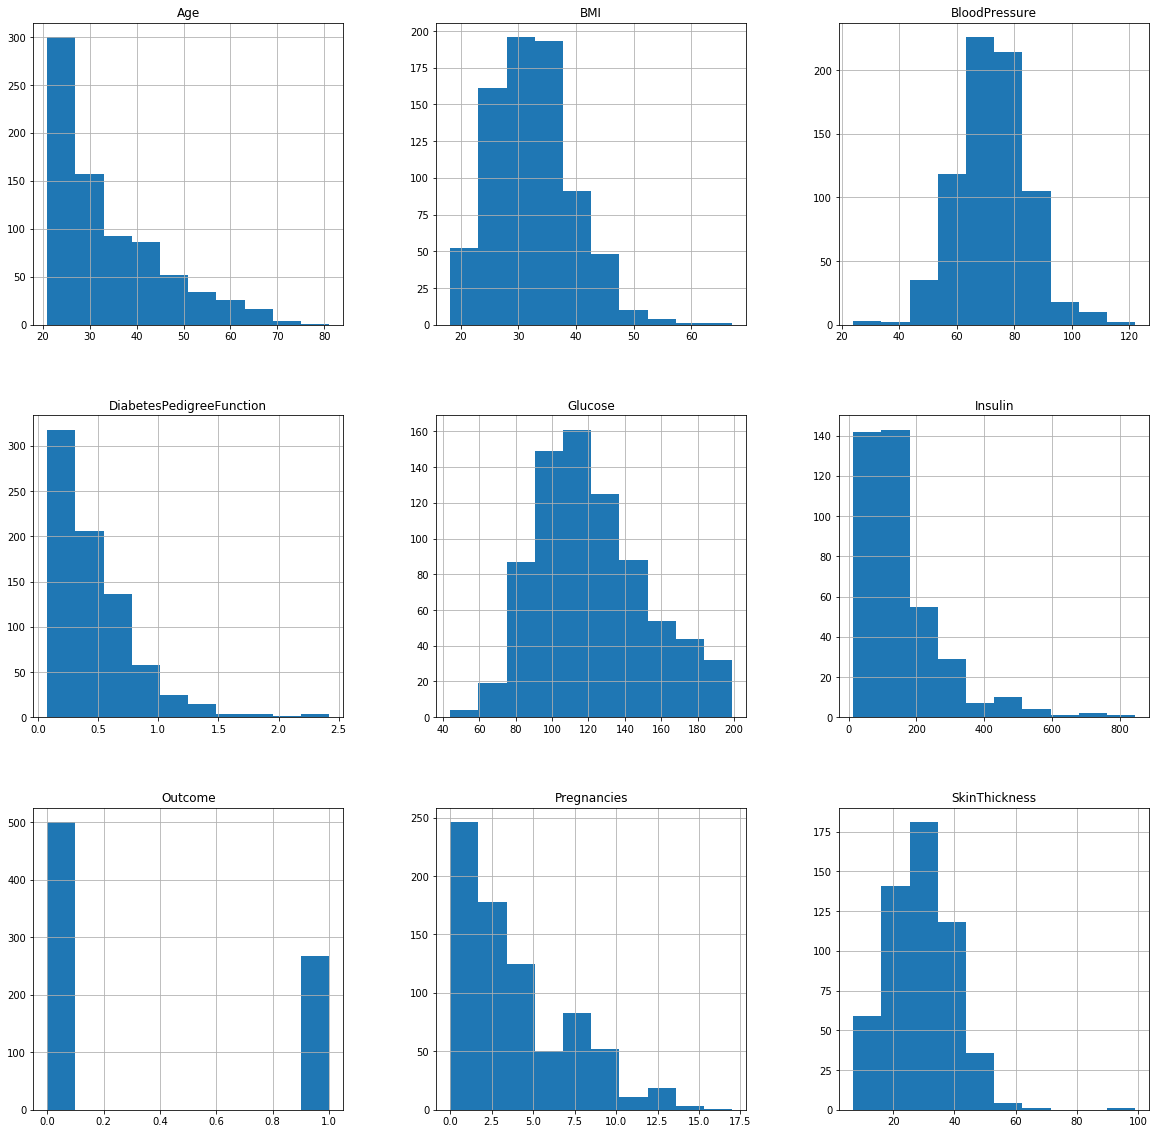

In [10]:
p = dataset.hist(figsize = (20,20))

In [11]:
# NaN values can be replaced with suitable values
dataset['Glucose'].fillna(dataset['Glucose'].mean(), inplace = True)
dataset['BloodPressure'].fillna(dataset['BloodPressure'].mean(), inplace = True)
dataset['SkinThickness'].fillna(dataset['SkinThickness'].median(), inplace = True)
dataset['Insulin'].fillna(dataset['Insulin'].median(), inplace = True)
dataset['BMI'].fillna(dataset['BMI'].median(), inplace = True)

In [12]:
print(dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


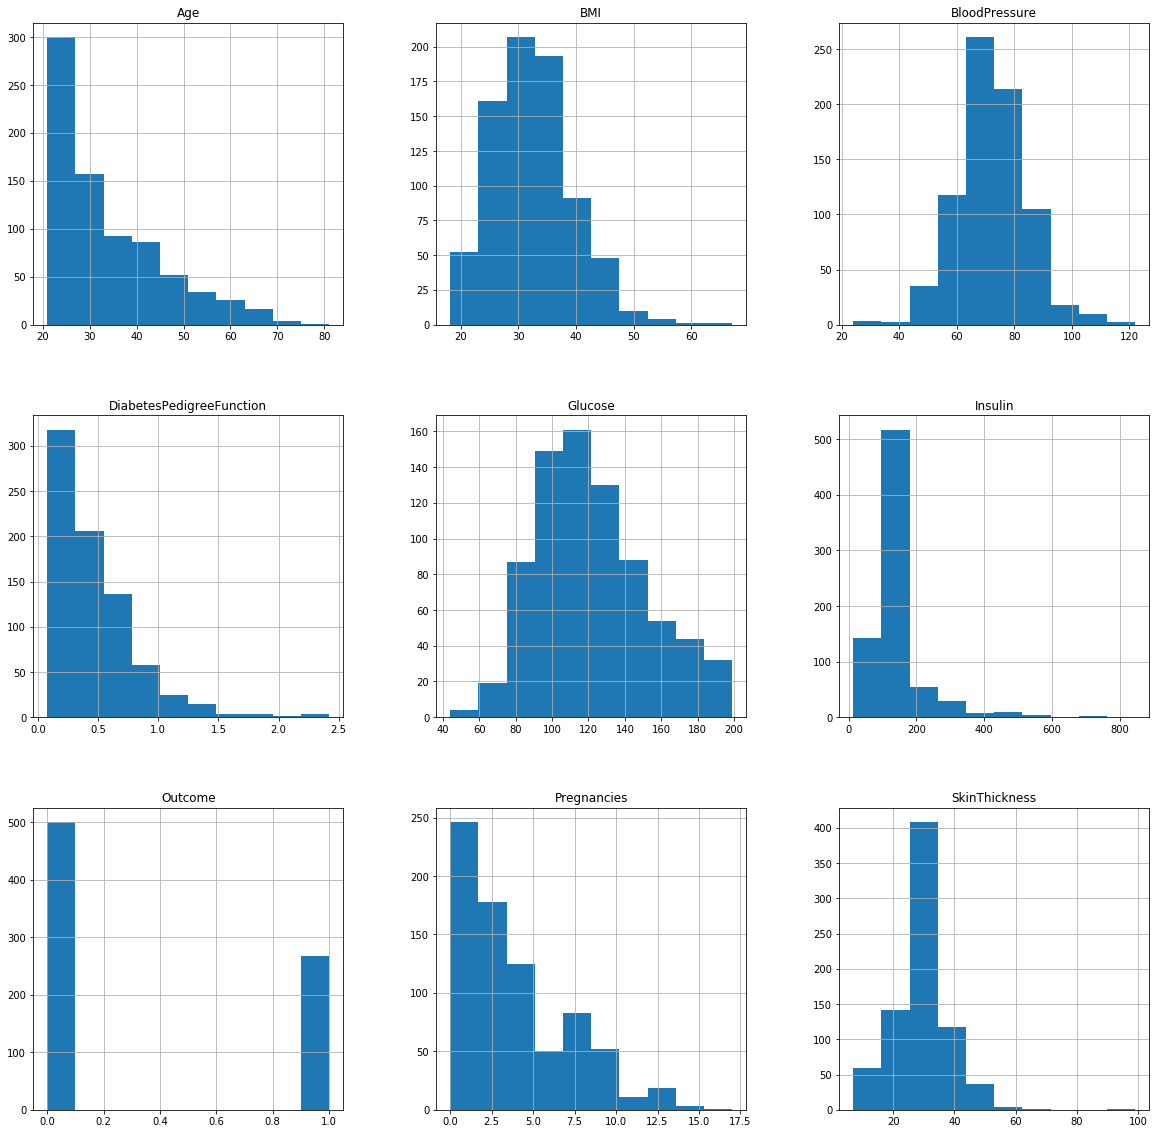

In [13]:
p = dataset.hist(figsize = (20,20))

0    500
1    268
Name: Outcome, dtype: int64


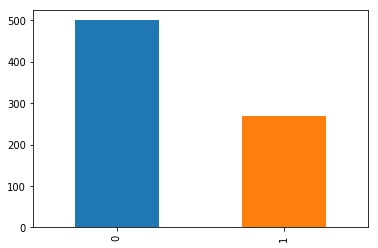

In [14]:
# show the distribution of the Outcome(label)
p = dataset.Outcome.value_counts().plot(kind="bar")
print(dataset.Outcome.value_counts())

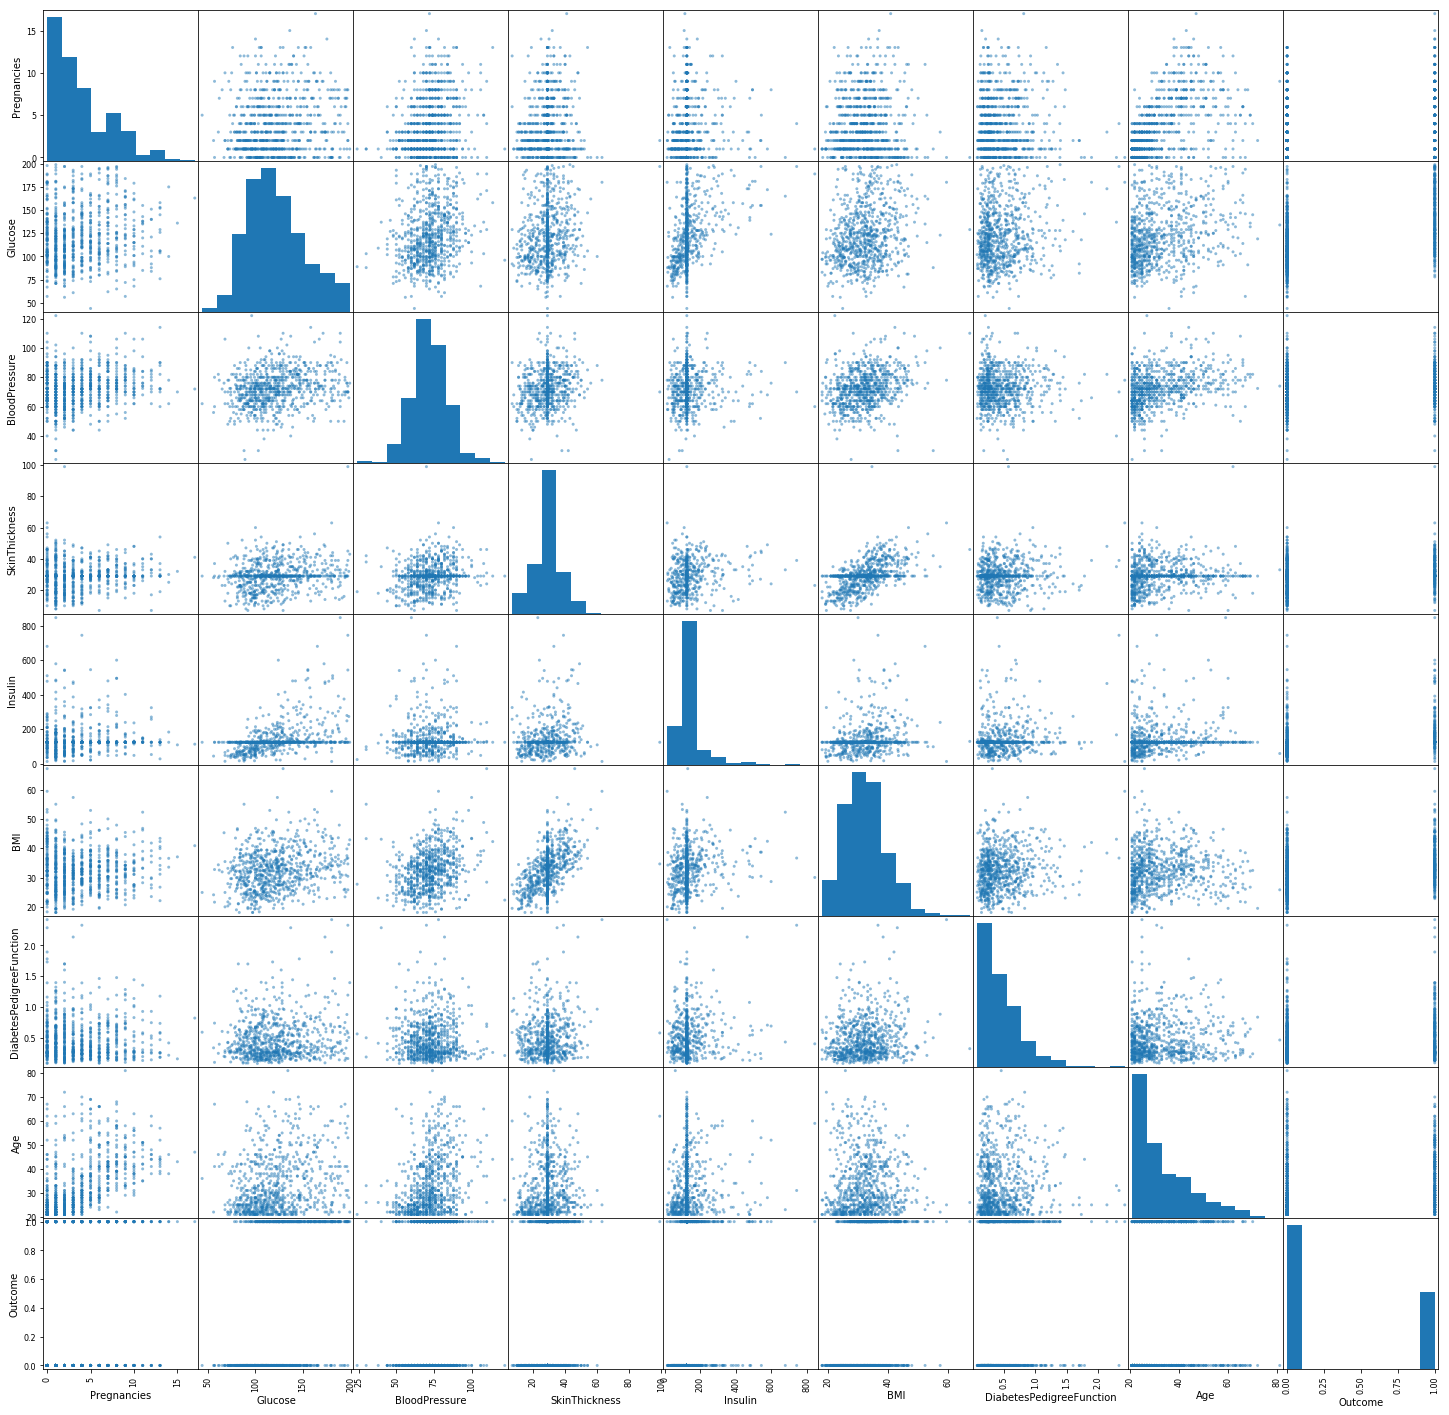

In [15]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(dataset,figsize=(25, 25))

In [16]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


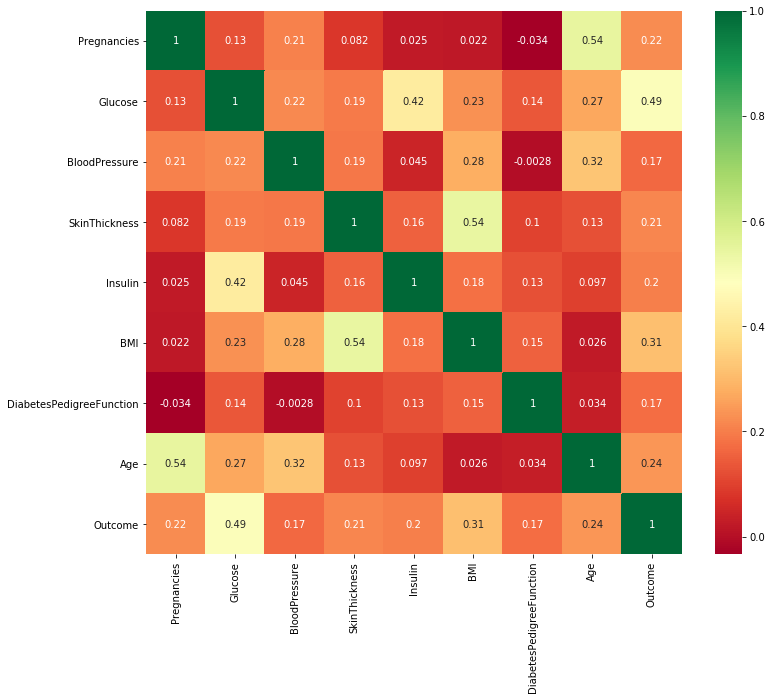

In [17]:
# show theheatmap of dataset correlation
plt.figure(figsize=(12,10)) 
p=sns.heatmap(dataset.corr(), annot=True, cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

## Scaling the data (StandardScaler)

## $Z = \frac{(X-mean)}{std}$

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X =  pd.DataFrame(sc.fit_transform(dataset.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [19]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [20]:
Y = dataset['Outcome']  # dataset.iloc[:,-1]

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [22]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape,

((614, 8), (154, 8), (614,), (154,))

### Calcultate Similarity

#### I use the Euclidian distance L2 to calculate similarity of two given instances.
```
d(p,q) = ((p1 - q1) + (p2 - q2) + (p3 - q4) + ... + (pn - qn))^1/2
```

In [130]:
def euclidean(inp1, inp2):
    distance = 0
    for i in range(len(inp1)): 
        distance = np.sqrt(np.sum(np.power(float(inp1[i]) - float(inp2[i]), 2)))
    return np.sqrt(distance)

In [129]:
euclidean([1,2],[1,1])

1.0

### Predict k-nearest-neighbors

In [127]:
def getNeighbors(data_test, data_train, data_train_labels, k_value):
    knn = []
    
    for i in range(len(data_test)):
        distance_list =[]
        # Compute distance between instance and all the examples in the training data
        for j in range(len(data_train)):
            euc = euclidean(data_test.iloc[i],data_train.iloc[j])
            distance_list.append(euc)
        # Sort by euclidian distance and return indices of the first k nearest neighbors in the distances list
        k_idx = np.argsort(distance_list)[:k_value]
        # Extract the labels corresponding to the k nearest neighbors
        knn_labels = [data_train_labels.iloc[x] for x in k_idx]
        # Majority vote
        maj_vote = Counter(knn_labels).most_common(1)
        #print(maj_vote[0][0])
        knn.append(maj_vote[0][0])
    return knn

In [ ]:
def accuracy(y, y_pred):
    accuracy = (np.sum(y == y_pred) / len(y))*100
    return accuracy

In [105]:
Y_pred = getNeighbors(X_test, X_train, Y_train, 13) # Prediction for the X_test data 

In [111]:
print("k = {} ====> accuracy = {}".format(13,accuracy(Y_test,Y_pred)))

k = 13 ====> accuracy = 72.72727272727273


In [95]:
############### hyperparameter tuning : best value for k ##################
list_accuracy = []
k =[]
for i in range(3,26):
    y_pred = getNeighbors(X_test, X_train, Y_train, i)
    list_accuracy.append(accuracy(Y_test,y_pred))
    k.append(i)

The optimal number of neighbors is 13


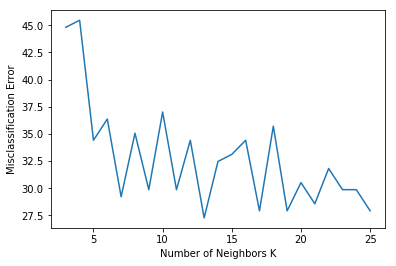

In [112]:
# changing to misclassification error
mse = [100 - ac for ac in list_accuracy]
print("The optimal number of neighbors is {}".format(13))
# plot misclassification error vs k
plt.plot(k, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

In [124]:
############### Confusion Matrix ##############################
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

mat_conf = confusion_matrix(Y_test,Y_pred)
print('################### Confusion Matrix ##############')
print(mat_conf)
print('\n')
print('################### Report #########################')
print(classification_report(Y_test,Y_pred))

################### Confusion Matrix ##############
[[91 16]
 [26 21]]


################### Report #########################
             precision    recall  f1-score   support

          0       0.78      0.85      0.81       107
          1       0.57      0.45      0.50        47

avg / total       0.71      0.73      0.72       154

